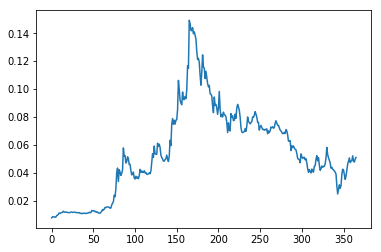

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, variance
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)
X = data.iloc[:,0:1].values
Y = data.iloc[:,1:2].values

plt.plot(Y[:,0])

In [10]:
from statistics import mean, variance

data = []
for i in range(len(Y)):
    data.append(Y[i,0])

# 標本平均を計算
ave = np.average(Y)
mean = mean(data)

print(ave)
print(mean)

0.054799426229508195
0.054799426229508195


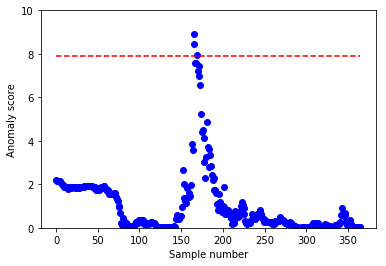

In [16]:
from statistics import mean, variance
from scipy import stats

data = []
for i in range(len(Y)):
    data.append(Y[i,0])

# 標本平均を計算
mean = mean(data)

# 標本分散を計算
variance = variance(data)

# 異常度を計算
scores = []
for x in data:
    score = (x - mean)**2 / variance
    scores.append(score)

# カイ二乗分布による1%水準の閾値
threshold = stats.chi2.interval(0.99, 1)[1]

# 結果の描画
plt.plot(scores, "o", color = "b")
plt.plot([0,365],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.ylim([0,10])
plt.show()

In [20]:
# 異常日を格納するリストの作成
over  = filter(lambda x: x > threshold, scores)
over_list = list(over)
[scores.index(i) for i in over_list ]

[165, 166, 169]

In [21]:
index = scores > threshold
X[index]

array([['2017-06-14 00:00:00'],
       ['2017-06-15 00:00:00'],
       ['2017-06-18 00:00:00']], dtype=object)

3.アドバンス課題

In [ ]:
from statistics import mean, variance
from scipy import stats

data = []
for i in range(len(Y)):
    data.append(Y[i,0])

# 標本平均を計算
mean = mean(data)

# 標本分散を計算
variance = variance(data)

# 異常度を計算
scores = []
for x in data:
    score = (x - mean)**2 / variance
    scores.append(score)

# カイ二乗分布による1%水準の閾値
threshold = stats.chi2.interval(0.99, 1)[1]

# 結果の描画
plt.plot(scores, "o", color = "b")
plt.plot([0,365],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.ylim([0,10])
plt.show()